In [25]:
from data_aug.data_aug import *
from data_aug.bbox_util import *
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
import pickle as pkl
from xml.etree.ElementTree import parse, Element
%matplotlib inline

In [66]:
def create_new(img, bboxes, doc, i):
    
    newfile = "train_%d.png" % i
    if len(img.shape) == 3:
        cv2.imwrite((img_path + newfile), img[:,:,::-1])
    else:
        cv2.imwrite((img_path + newfile), img)
    root = doc.getroot()
    for find in root.iter('filename'):
        find.text = "train_%d.png" % i
        
    for find in root.iter('path'):
        find.text = "D:\\DeepLearning\\Hoop\\images\\train_%d.png" % i
        
    for find in root.iter('size'):
        find[0].text = str(img.shape[1])
        find[1].text = str(img.shape[0])
        if len(img.shape) != 3:
            find[2].text = "1"
            
    for find in root.iter('bndbox'):
        for k in range(4):
            find[k].text = str(bboxes[0, k])
            
    doc.write((label_path + "train_%d.xml" % i))


In [74]:
img_path = './../Hoop/images/'
label_path = './../Hoop/label/'
i = 370
for xml in os.listdir(label_path):
    #xml = "label/train_182.xml"
    file_num = int(xml.split("_")[1].split(".")[0])
    doc = parse(label_path + xml)
    root = doc.getroot()
    bboxes = np.zeros((1, 4))
    #tmp[0, 0] = file_num
    for find in root.iter('bndbox'):
        for k in range(4):
            bboxes[0, k] = int(find[k].text)
    bboxes = np.reshape(bboxes, (1, 4))
    #print(bboxes)
    
    img = cv2.imread((img_path + "train_%d.png" % file_num))[:,:,::-1]
    # Horizontal Flip
    h_flip, h_bboxes = RandomHorizontalFlip(1)(img.copy(), bboxes.copy())
    create_new(h_flip, h_bboxes, doc, i)
    i += 1
    # Scale
    s_img, s_bb = RandomScale(0.3, diff = True)(img.copy(), bboxes.copy())
    create_new(s_img, s_bb, doc, i)
    i += 1
    # Translation
    t_img, t_bb = RandomTranslate(0.3, diff = True)(img.copy(), bboxes.copy())
    create_new(t_img, t_bb, doc, i)
    i += 1
    # Rotation
    rr_img, rr_bb = RandomRotate(30)(img.copy(), bboxes.copy())
    create_new(rr_img, rr_bb, doc, i)
    i += 1
    
    rl_img, rl_bb = RandomRotate(-30)(img.copy(), bboxes.copy())
    create_new(rl_img, rl_bb, doc, i)
    i += 1
    # Shear
    sh_img, sh_bb = RandomShear(0.2)(img.copy(), bboxes.copy())
    create_new(sh_img, sh_bb, doc, i)
    i += 1
    # Resize
    re_img, re_bb = Resize(608)(img.copy(), bboxes.copy())
    create_new(re_img, re_bb, doc, i)
    i += 1
    # Gray Scale
    gray_scale = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    create_new(gray_scale, bboxes, doc, i)
    i += 1

IndexError: index 0 is out of bounds for axis 0 with size 0

(4032, 3024, 3)


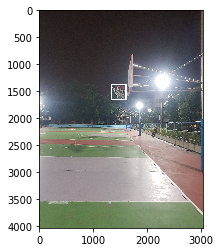

(4032, 3024)


In [70]:
img = cv2.imread((path + "images/train_182.png"))[:,:,::-1]   #opencv loads images in bgr. the [:,:,::-1] does bgr -> rgb
bboxes = np.array([[1342., 1376., 1603., 1655.]])
print(img.shape)
plotted_img = draw_rect(img, bboxes)
plt.imshow(plotted_img)
plt.show()
print(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY).shape)

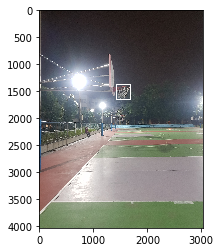

In [37]:
img_, bboxes_ = RandomHorizontalFlip(1)(img.copy(), bboxes.copy())
plotted_img = draw_rect(img_, bboxes_)
plt.imshow(plotted_img)
plt.show()

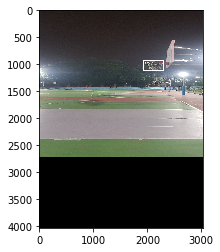

In [39]:
img_, bboxes_ = RandomScale(0.5, diff = True)(img.copy(), bboxes.copy())
plotted_img = draw_rect(img_, bboxes_)
plt.imshow(plotted_img)
plt.show()

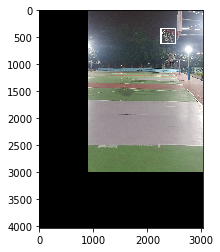

In [14]:
img_, bboxes_ = RandomTranslate(0.3, diff = True)(img.copy(), bboxes.copy())
plotted_img = draw_rect(img_, bboxes_)
plt.imshow(plotted_img)
plt.show()

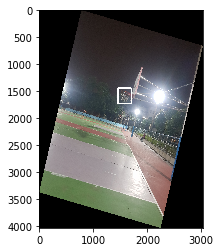

In [72]:
img_, bboxes_ = RandomRotate(-30)(img.copy(), bboxes.copy())
plotted_img = draw_rect(img_, bboxes_)
plt.imshow(plotted_img)
plt.show()

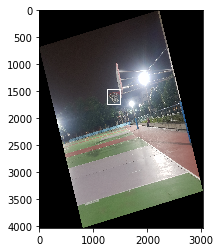

In [73]:
img_, bboxes_ = RandomRotate(30)(img.copy(), bboxes.copy())
plotted_img = draw_rect(img_, bboxes_)
plt.imshow(plotted_img)
plt.show()

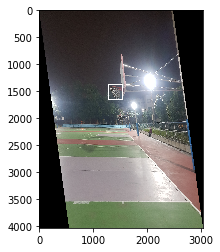

In [16]:
img_, bboxes_ = RandomShear(0.2)(img.copy(), bboxes.copy())
plotted_img = draw_rect(img_, bboxes_)
plt.imshow(plotted_img)
plt.show()

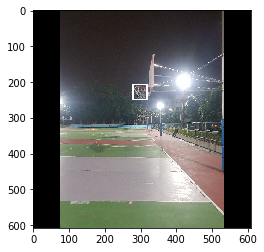

In [17]:
img_, bboxes_ = Resize(608)(img.copy(), bboxes.copy())
plotted_img = draw_rect(img_, bboxes_)
plt.imshow(plotted_img)
plt.show()

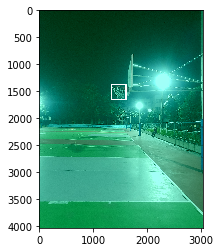

In [18]:
img_, bboxes_ = RandomHSV(100, 100, 100)(img.copy(), bboxes.copy())
plotted_img = draw_rect(img_, bboxes_)
plt.imshow(plotted_img)
plt.show()

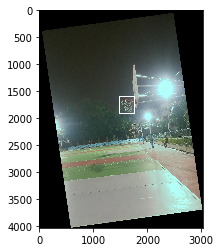

In [19]:
seq = Sequence([RandomHSV(40, 40, 30),RandomHorizontalFlip(), RandomScale(), RandomTranslate(), RandomRotate(10), RandomShear()])
img_, bboxes_ = seq(img.copy(), bboxes.copy())

plotted_img = draw_rect(img_, bboxes_)
plt.imshow(plotted_img)
plt.show()